## Libraries import

In [1]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import matplotlib.pyplot as plt

## Log file reading

In [32]:
infile = r"../data/access.log"
with open(infile) as f:
    pass
    f = f.readlines()

## Dataframe building

In [8]:
# the idea is to buid dict firstly and then convert it to the dataframe
showcase = {}
key = 0
for line in tqdm(f):
    device = line.split(' ')[0]
    if device not in showcase:
        showcase[device] = {
            'device': device,
            'key': key,
            'device_user_num': 0,
            'device_activities': 0,
        }
        key += 1
    else:
        showcase[device]['device_user_num'] += 1    
    showcase[device]['device_activities'] += 1
    showcase[device]['device_user_num'] += 1
    response = 'response ' + line.split('\"')[2].split(' ')[1]
    if response not in showcase[device]:
        showcase[device][response] = 1
    else:
        showcase[device][response] += 1
    browser = 'browser ' + line.split('\"')[-4].split(' ')[0]
    if browser not in showcase[device]:
        showcase[device][browser] = 1
    else:
        showcase[device][browser] += 1
df = pd.DataFrame.from_dict(data=showcase)
df = df.fillna(0)

100%|██████████████████████████████████████████████████████████████████| 10365152/10365152 [01:08<00:00, 150297.71it/s]


In [11]:
df

,54.36.149.41,31.56.96.51,40.77.167.129,91.99.72.15,66.249.66.194,207.46.13.136,178.253.33.51,66.249.66.91,5.78.198.52,34.247.132.53,...,5.114.122.231,180.94.84.225,204.18.174.252,5.114.208.113,46.225.214.29,83.120.53.37,5.122.62.165,151.241.254.118,5.112.12.77,45.79.177.249
device,54.36.149.41,31.56.96.51,40.77.167.129,91.99.72.15,66.249.66.194,207.46.13.136,178.253.33.51,66.249.66.91,5.78.198.52,34.247.132.53,...,5.114.122.231,180.94.84.225,204.18.174.252,5.114.208.113,46.225.214.29,83.120.53.37,5.122.62.165,151.241.254.118,5.112.12.77,45.79.177.249
key,0,1,2,3,4,5,6,7,8,9,...,258596,258597,258598,258599,258600,258601,258602,258603,258604,258605
device_user_num,313,155,853,77387,706965,1851,13,629043,99,13659,...,1,13,1,1,21,1,1,17,1,1
device_activities,157,78,427,38694,353483,926,7,314522,50,6830,...,1,7,1,1,11,1,1,9,1,1
response 200,123,78,228,38507,306128,889,7,117286,50,6686,...,1,7,1,1,11,1,1,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
browser HTCT327t_TD/1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
browser WhatsApp/2.18.91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
browser Safari/12604.1.38.1.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
browser SAMSUNG-SM-B313E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Transpose dataframe such that columns become rows and vica versa

In [13]:
exp_df = df.copy()
exp_df = exp_df.transpose()

In [14]:
exp_df

,device,key,device_user_num,device_activities,response 200,browser Mozilla/5.0,response 302,response 404,response 301,response 499,...,browser WhatsApp/2.18.266,browser WhatsApp/0.3.1652,browser AndroidDownloadManager/8.1.0,browser Thither.Direct,browser curl/7.28.1,browser HTCT327t_TD/1.0,browser WhatsApp/2.18.91,browser Safari/12604.1.38.1.7,browser SAMSUNG-SM-B313E,browser AndroidDownloadManager/4.1.2
54.36.149.41,54.36.149.41,0,313,157,123,157,30,1,1,2,...,0,0,0,0,0,0,0,0,0,0
31.56.96.51,31.56.96.51,1,155,78,78,78,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40.77.167.129,40.77.167.129,2,853,427,228,427,2,2,195,0,...,0,0,0,0,0,0,0,0,0,0
91.99.72.15,91.99.72.15,3,77387,38694,38507,38694,0,154,0,0,...,0,0,0,0,0,0,0,0,0,0
66.249.66.194,66.249.66.194,4,706965,353483,306128,346937,36313,10865,62,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83.120.53.37,83.120.53.37,258601,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.122.62.165,5.122.62.165,258602,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151.241.254.118,151.241.254.118,258603,17,9,9,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.112.12.77,5.112.12.77,258604,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Take first n (in my case n = 10) rows such that further visualisation is possible

In [108]:
sort_df = exp_df.sort_values('device_user_num', ascending=False)
records_limit = 10
max_df = sort_df.iloc[:records_limit]
filtered_max_df = max_df.loc[:, (max_df != 0).any(axis=0)]

In [24]:
filtered_max_df

,device,key,device_user_num,device_activities,response 200,browser Mozilla/5.0,response 302,response 404,response 301,response 499,...,response 400,browser -,response 504,response 304,browser Mozilla/4.0,response 408,response 401,response 414,response 405,browser Microsoft
66.249.66.194,66.249.66.194,4,706965,353483,306128,346937,36313,10865,62,4,...,1,1,1,0,0,0,0,0,0,0
66.249.66.91,66.249.66.91,7,629043,314522,117286,205592,301,85,0,0,...,0,0,30,196749,0,0,0,0,0,0
151.239.241.163,151.239.241.163,4021,184949,92475,79537,92472,8854,326,1,402,...,0,2,0,2506,1,0,220,2,2,0
66.249.66.92,66.249.66.92,400,176663,88332,25433,56966,45,22,0,0,...,0,0,5,62803,0,0,0,0,0,0
91.99.30.32,91.99.30.32,4094,91957,45979,38781,45967,4727,359,0,462,...,0,6,0,1531,3,0,17,6,2,3
104.222.32.91,104.222.32.91,77532,84115,42058,30230,42058,569,0,0,55,...,0,0,0,0,0,0,0,0,0,0
91.99.72.15,91.99.72.15,3,77387,38694,38507,38694,0,154,0,0,...,0,0,0,0,0,0,0,0,0,0
91.99.47.57,91.99.47.57,196851,77223,38612,31865,38609,4374,353,1,419,...,0,3,0,1019,0,0,34,3,0,0
5.78.190.233,5.78.190.233,80534,74407,37204,30459,37203,4009,384,0,362,...,0,1,0,1870,0,0,23,1,1,0
195.181.168.181,195.181.168.181,11562,55957,27979,27018,27979,677,0,0,89,...,0,0,0,107,0,1,0,0,0,0


## Visualisation for all devices

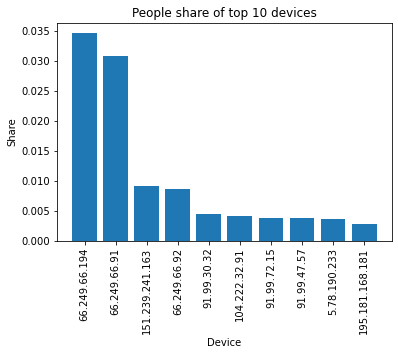

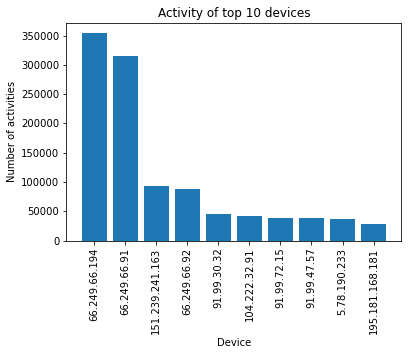

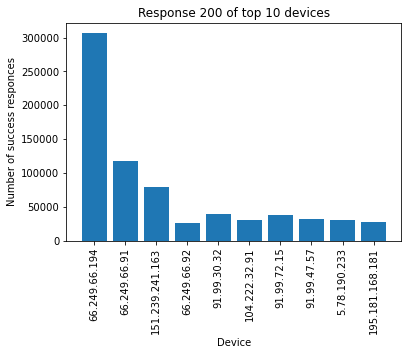

In [51]:
overall_users_num = sum(exp_df.device_user_num)
max_limit_users_num = list(filtered_max_df.device_user_num)
devices = list(filtered_max_df.device)
people_share = []
for num in max_limit_users_num:
    people_share.append(num/overall_users_num)
plt.bar(devices, people_share)
plt.xticks(rotation='vertical')
plt.title("People share of top 10 devices")
plt.xlabel("Device")
plt.ylabel("Share")
plt.show()

max_device_ativities = list(filtered_max_df.device_activities)
plt.bar(devices, max_device_ativities)
plt.xticks(rotation='vertical')
plt.title("Activity of top 10 devices")
plt.xlabel("Device")
plt.ylabel("Number of activities")
plt.show()

max_response_200 = list(filtered_max_df['response 200'])
plt.bar(devices, max_response_200)
plt.xticks(rotation='vertical')
plt.title("Response 200 of top 10 devices")
plt.xlabel("Device")
plt.ylabel("Number of success responces")
plt.show()
    

## Statistics for response...

In [66]:
filter_col = [col for col in filtered_max_df if col.startswith('response')]
filter_col.remove('response 200')
response_df = filtered_max_df[filter_col]

## ...and its visualisation for each device separately

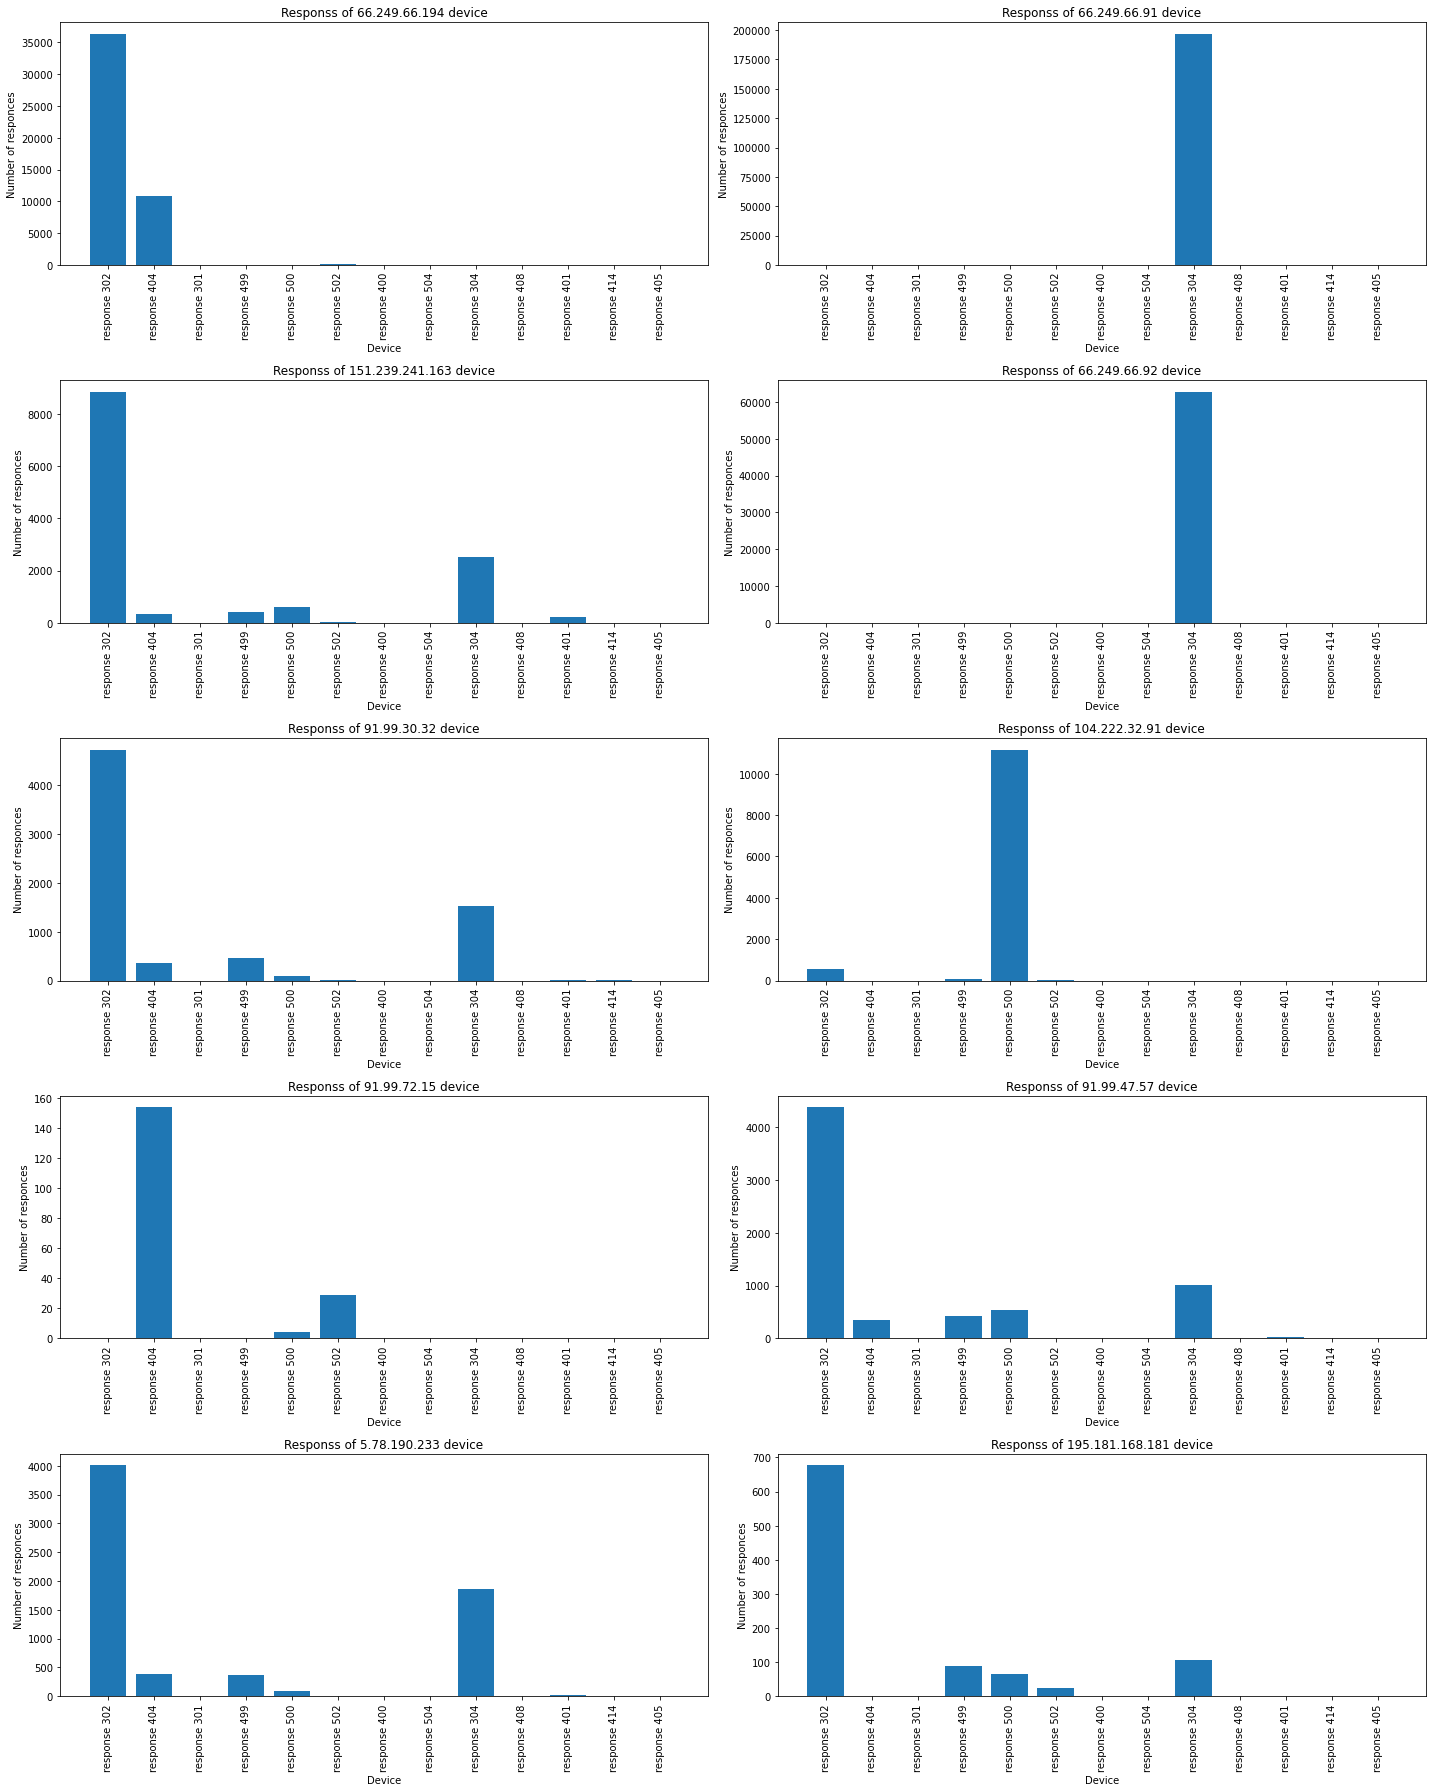

In [107]:
row_list =[]
  
# Iterate over each row
for index, rows in response_df.iterrows():
    # Create list for the current row
    my_list =[rows[row] for row in list(response_df.columns)]
    # append the list to the final list
    row_list.append(my_list)
# row_list
devices = list(response_df.index)


fig = plt.figure(10)
fig.set_figheight(25)
fig.set_figwidth(20)
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.bar(response_df.columns, row_list[i])
    plt.xticks(rotation='vertical')
    plt.title(f"Responss of {devices[i]} device")
    plt.xlabel("Device")
    plt.ylabel("Number of responces")
plt.tight_layout()